# Breast Cancer Detection

In [11]:
# pip install imbalanced-learn xgboost

## Import libraries

In [3]:
# Math & Deal with Dataframes
import numpy as np 
import pandas as pd 
# visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
# Preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
# Evaluation
from sklearn.metrics import classification_report
# Warnings
import warnings
warnings.filterwarnings('ignore')


## Read The Data 


make change in below file path which is in cotes(' ')
1.go to the folder where the csv file or excel sheet is present
2.right click on csv file 
3.go to properties
4.copy the path/address
5.and paste below into the ' '
6.and last paste (\breast-cancer.csv) as it is name of csv file 
note:(r)in the paranthesis is to read file while making the change make sure you don't remove 'r' in the paranthesis

In [4]:
import pandas as pd
import numpy as np

In [5]:
df =pd.read_csv(r"C:\Users\chinc\Downloads\breast cancer prediction1\breast cancer prediction\breast-cancer.csv")

In [6]:
# Statistical Measuers For Each Column 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
!pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn xgboost

## Checking Nulls & Dublicates

In [8]:
# the shape of the data 
df.shape

(569, 32)

In [9]:
# Data Information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# Data Nulls
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# Data Dublicates 
df.duplicated().sum()

np.int64(0)

In [12]:
# number of uniuqes of the data 
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [13]:
# drop id column 
df.drop(columns=['id'] , inplace=True , axis=1)

## Outliers

In [14]:
# Replace M to 1 and B to 0
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

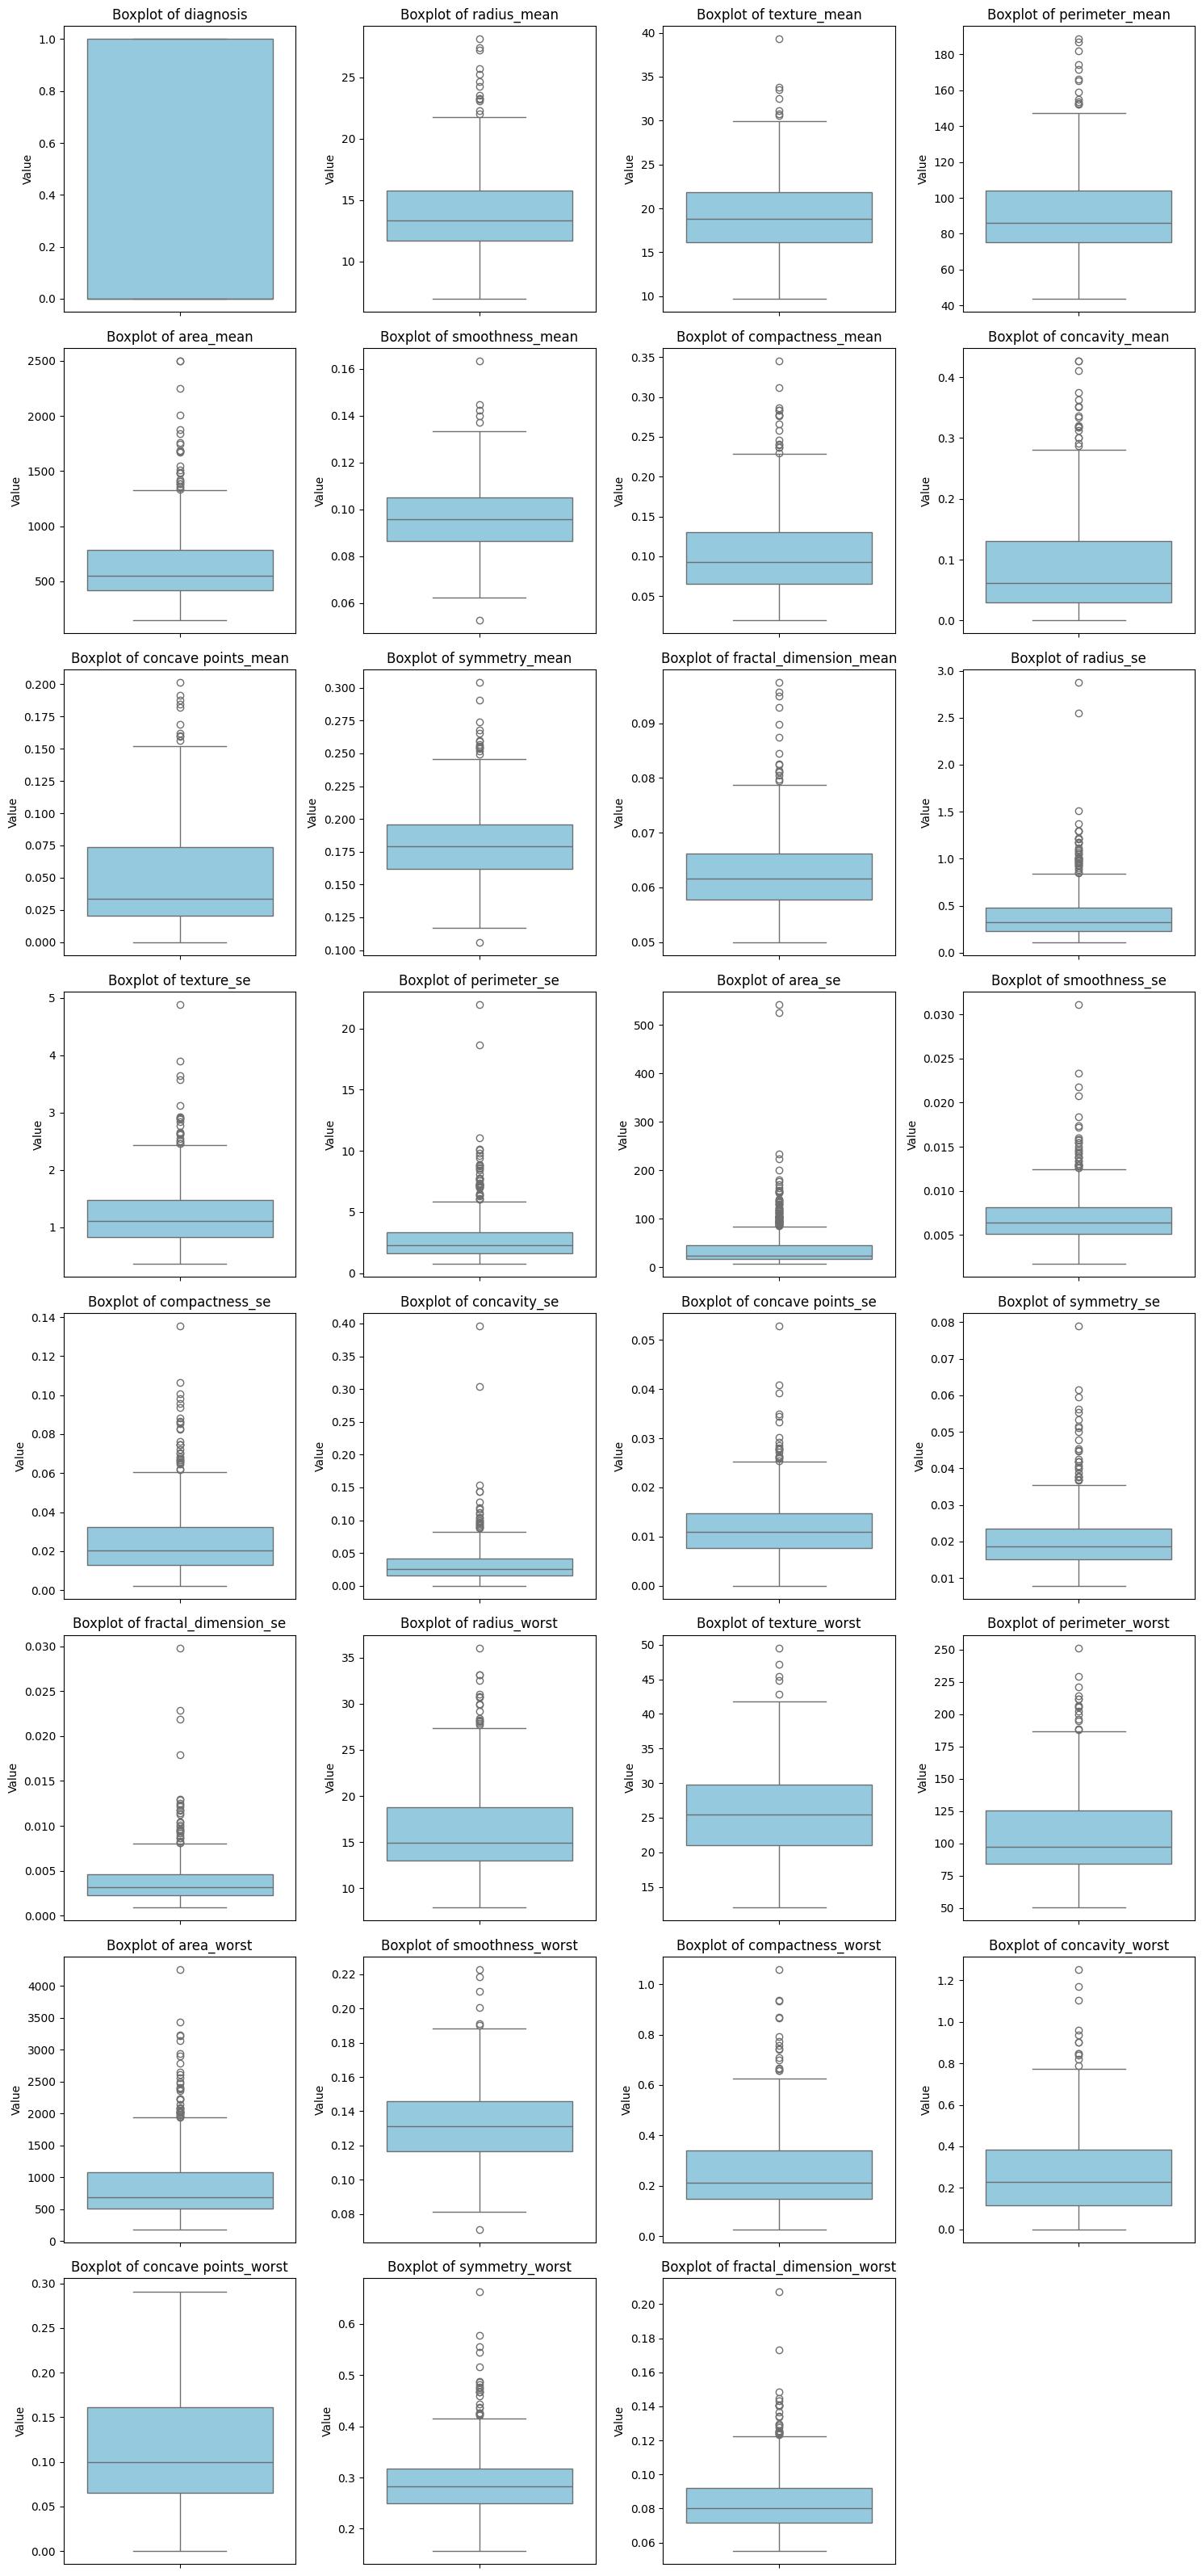

In [15]:
# checking columns outliers  
numerical_cols = df.select_dtypes(include=['number']).columns

num_cols = 4
num_rows = -(-len(numerical_cols) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Value")
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

In [16]:
# remove outliers
def remove_outliers_iqr(df, cols):
    df_cleaned = df.copy()
    for col in cols:
        Q1 = df_cleaned[col].quantile(0.25)  
        Q3 = df_cleaned[col].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, df.columns[1:])

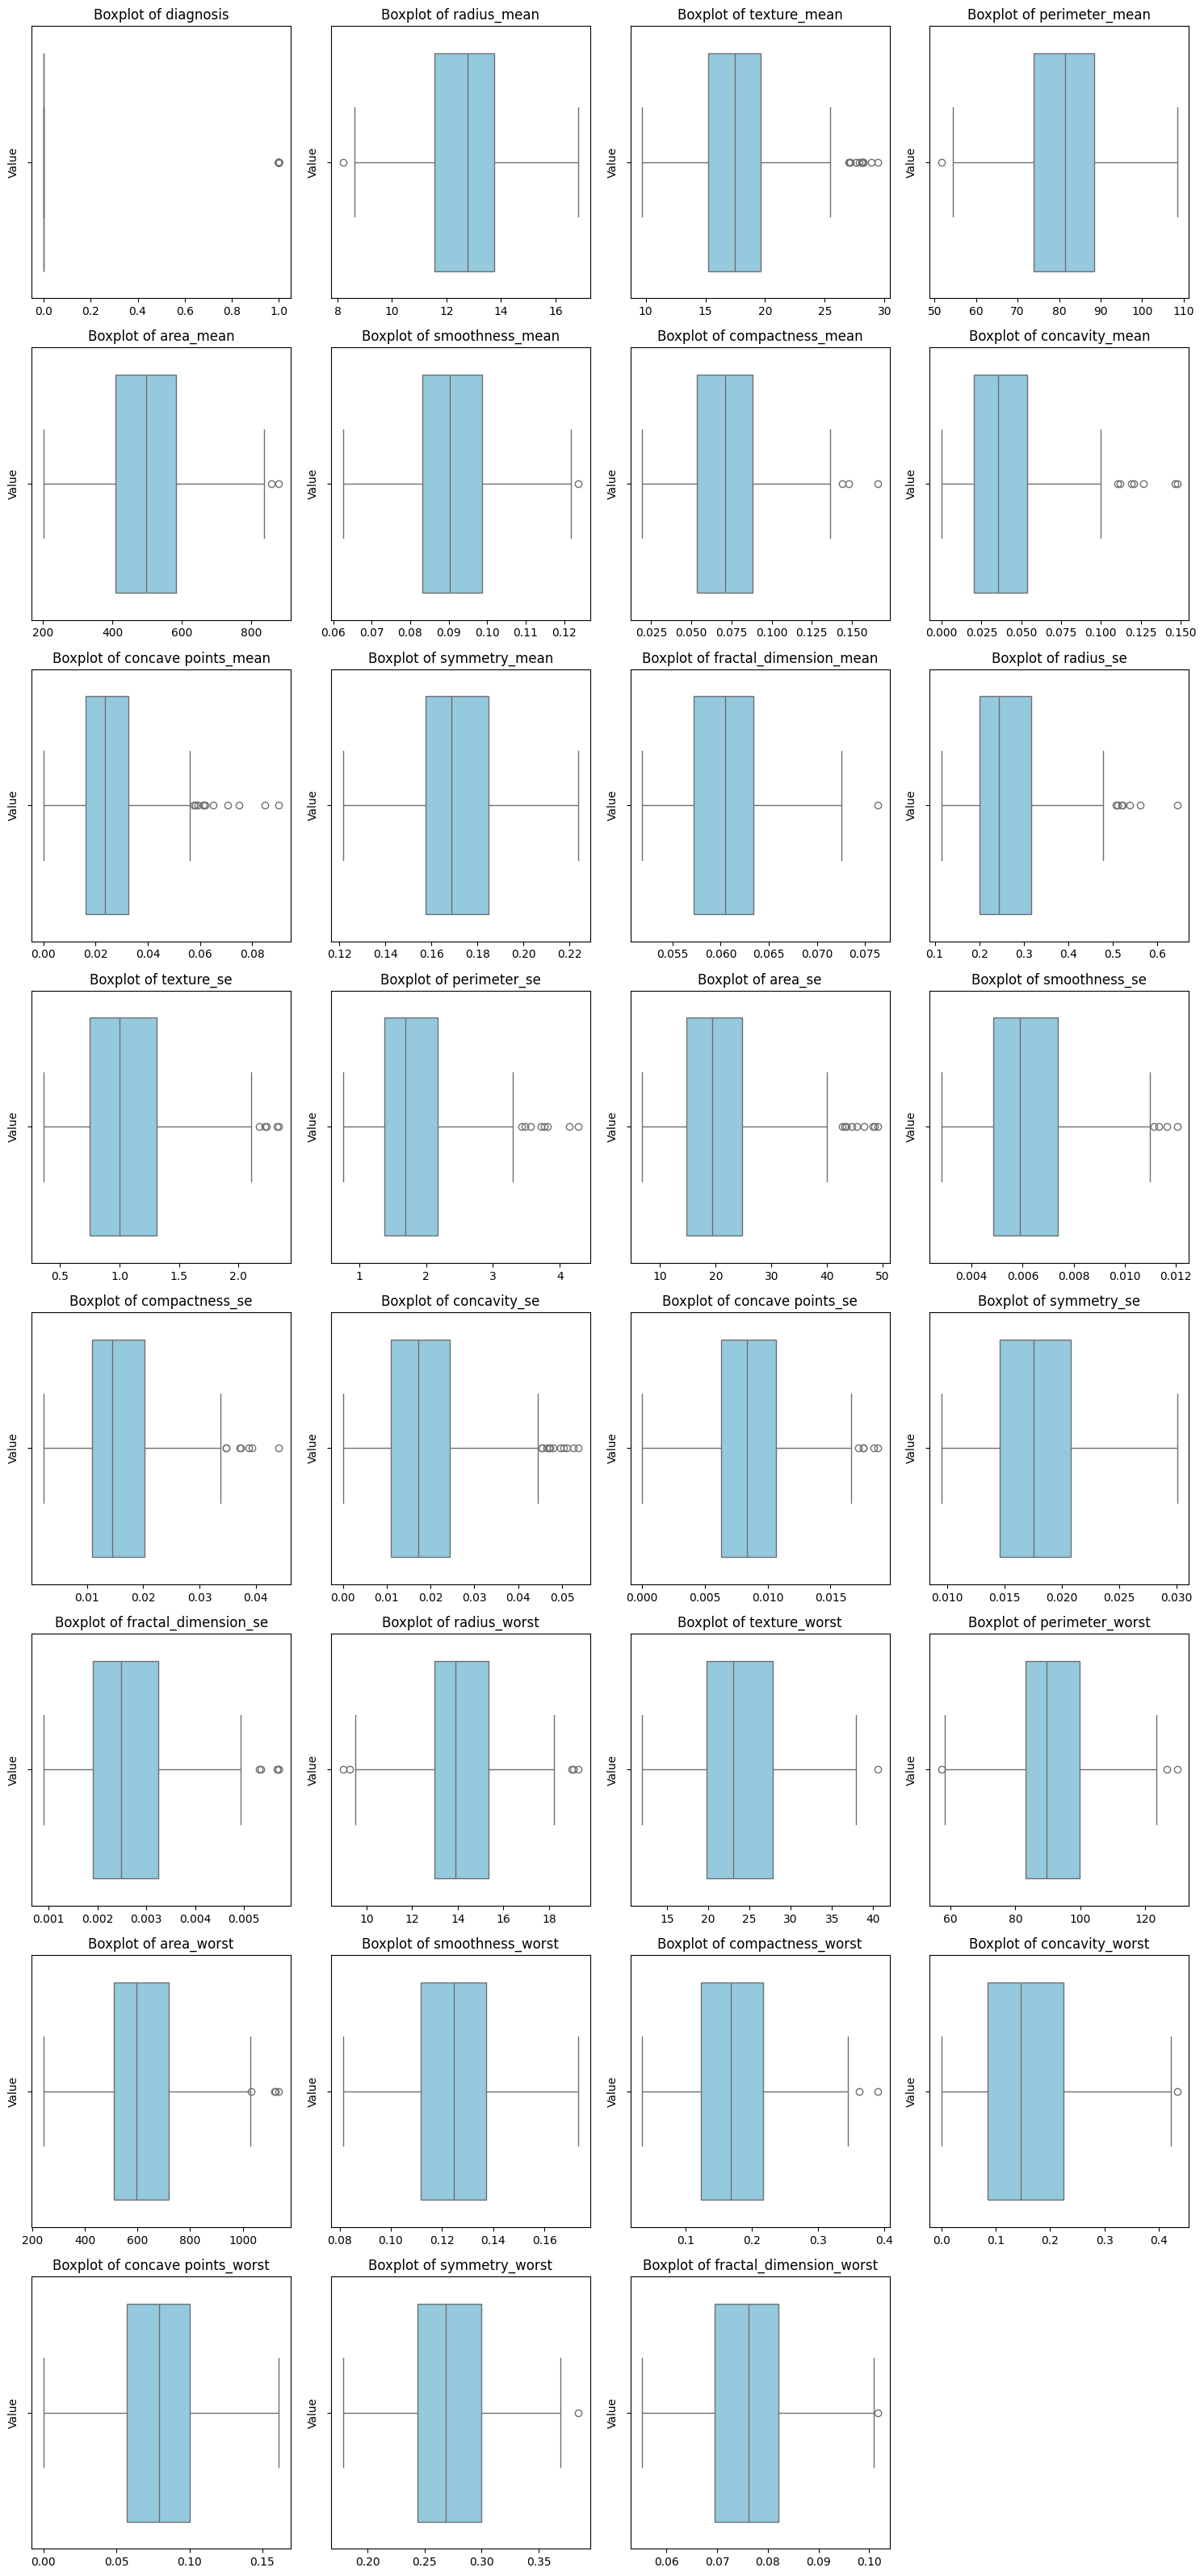

In [17]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns.tolist()

if len(numerical_cols) == 0:
    print("No numerical columns available after outlier removal.")
else:
    num_cols = 4  
    num_rows = -(-len(numerical_cols) // num_cols)  

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()  

    for i, col in enumerate(numerical_cols):
        if df_cleaned[col].nunique() > 1: 
            sns.boxplot(data=df_cleaned, x=col, ax=axes[i], color="skyblue")
            axes[i].set_title(f'Boxplot of {col}', fontsize=12)
            axes[i].set_xlabel("")
            axes[i].set_ylabel("Value")
        else:
            axes[i].axis("off")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


## EDA & Visualization

In [18]:
# Diagnosis Column Value Counts for each elemnt in it 
df['diagnosis'].value_counts() 

diagnosis
0    357
1    212
Name: count, dtype: int64

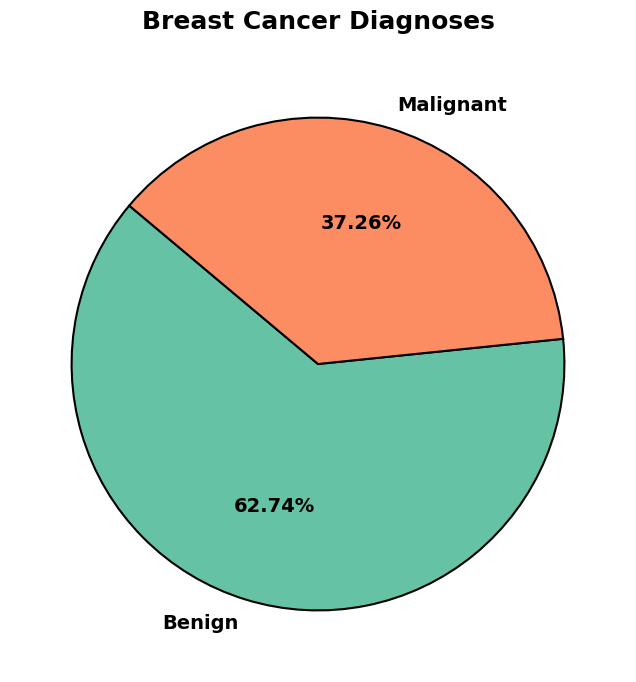

In [19]:
# Pie plot for Diagnoses column
colors = ['#66c2a5', '#fc8d62'] 

plt.figure(figsize=(8, 8))
plt.pie(
    x=df['diagnosis'].value_counts(),
    labels=['Benign', 'Malignant'],
    autopct='%1.2f%%',
    colors=colors,
    startangle=140, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  
    textprops={'fontsize': 14, 'weight': 'bold'}  
)


plt.title('Breast Cancer Diagnoses', fontsize=18, fontweight='bold', color='black', pad=20)
plt.show()


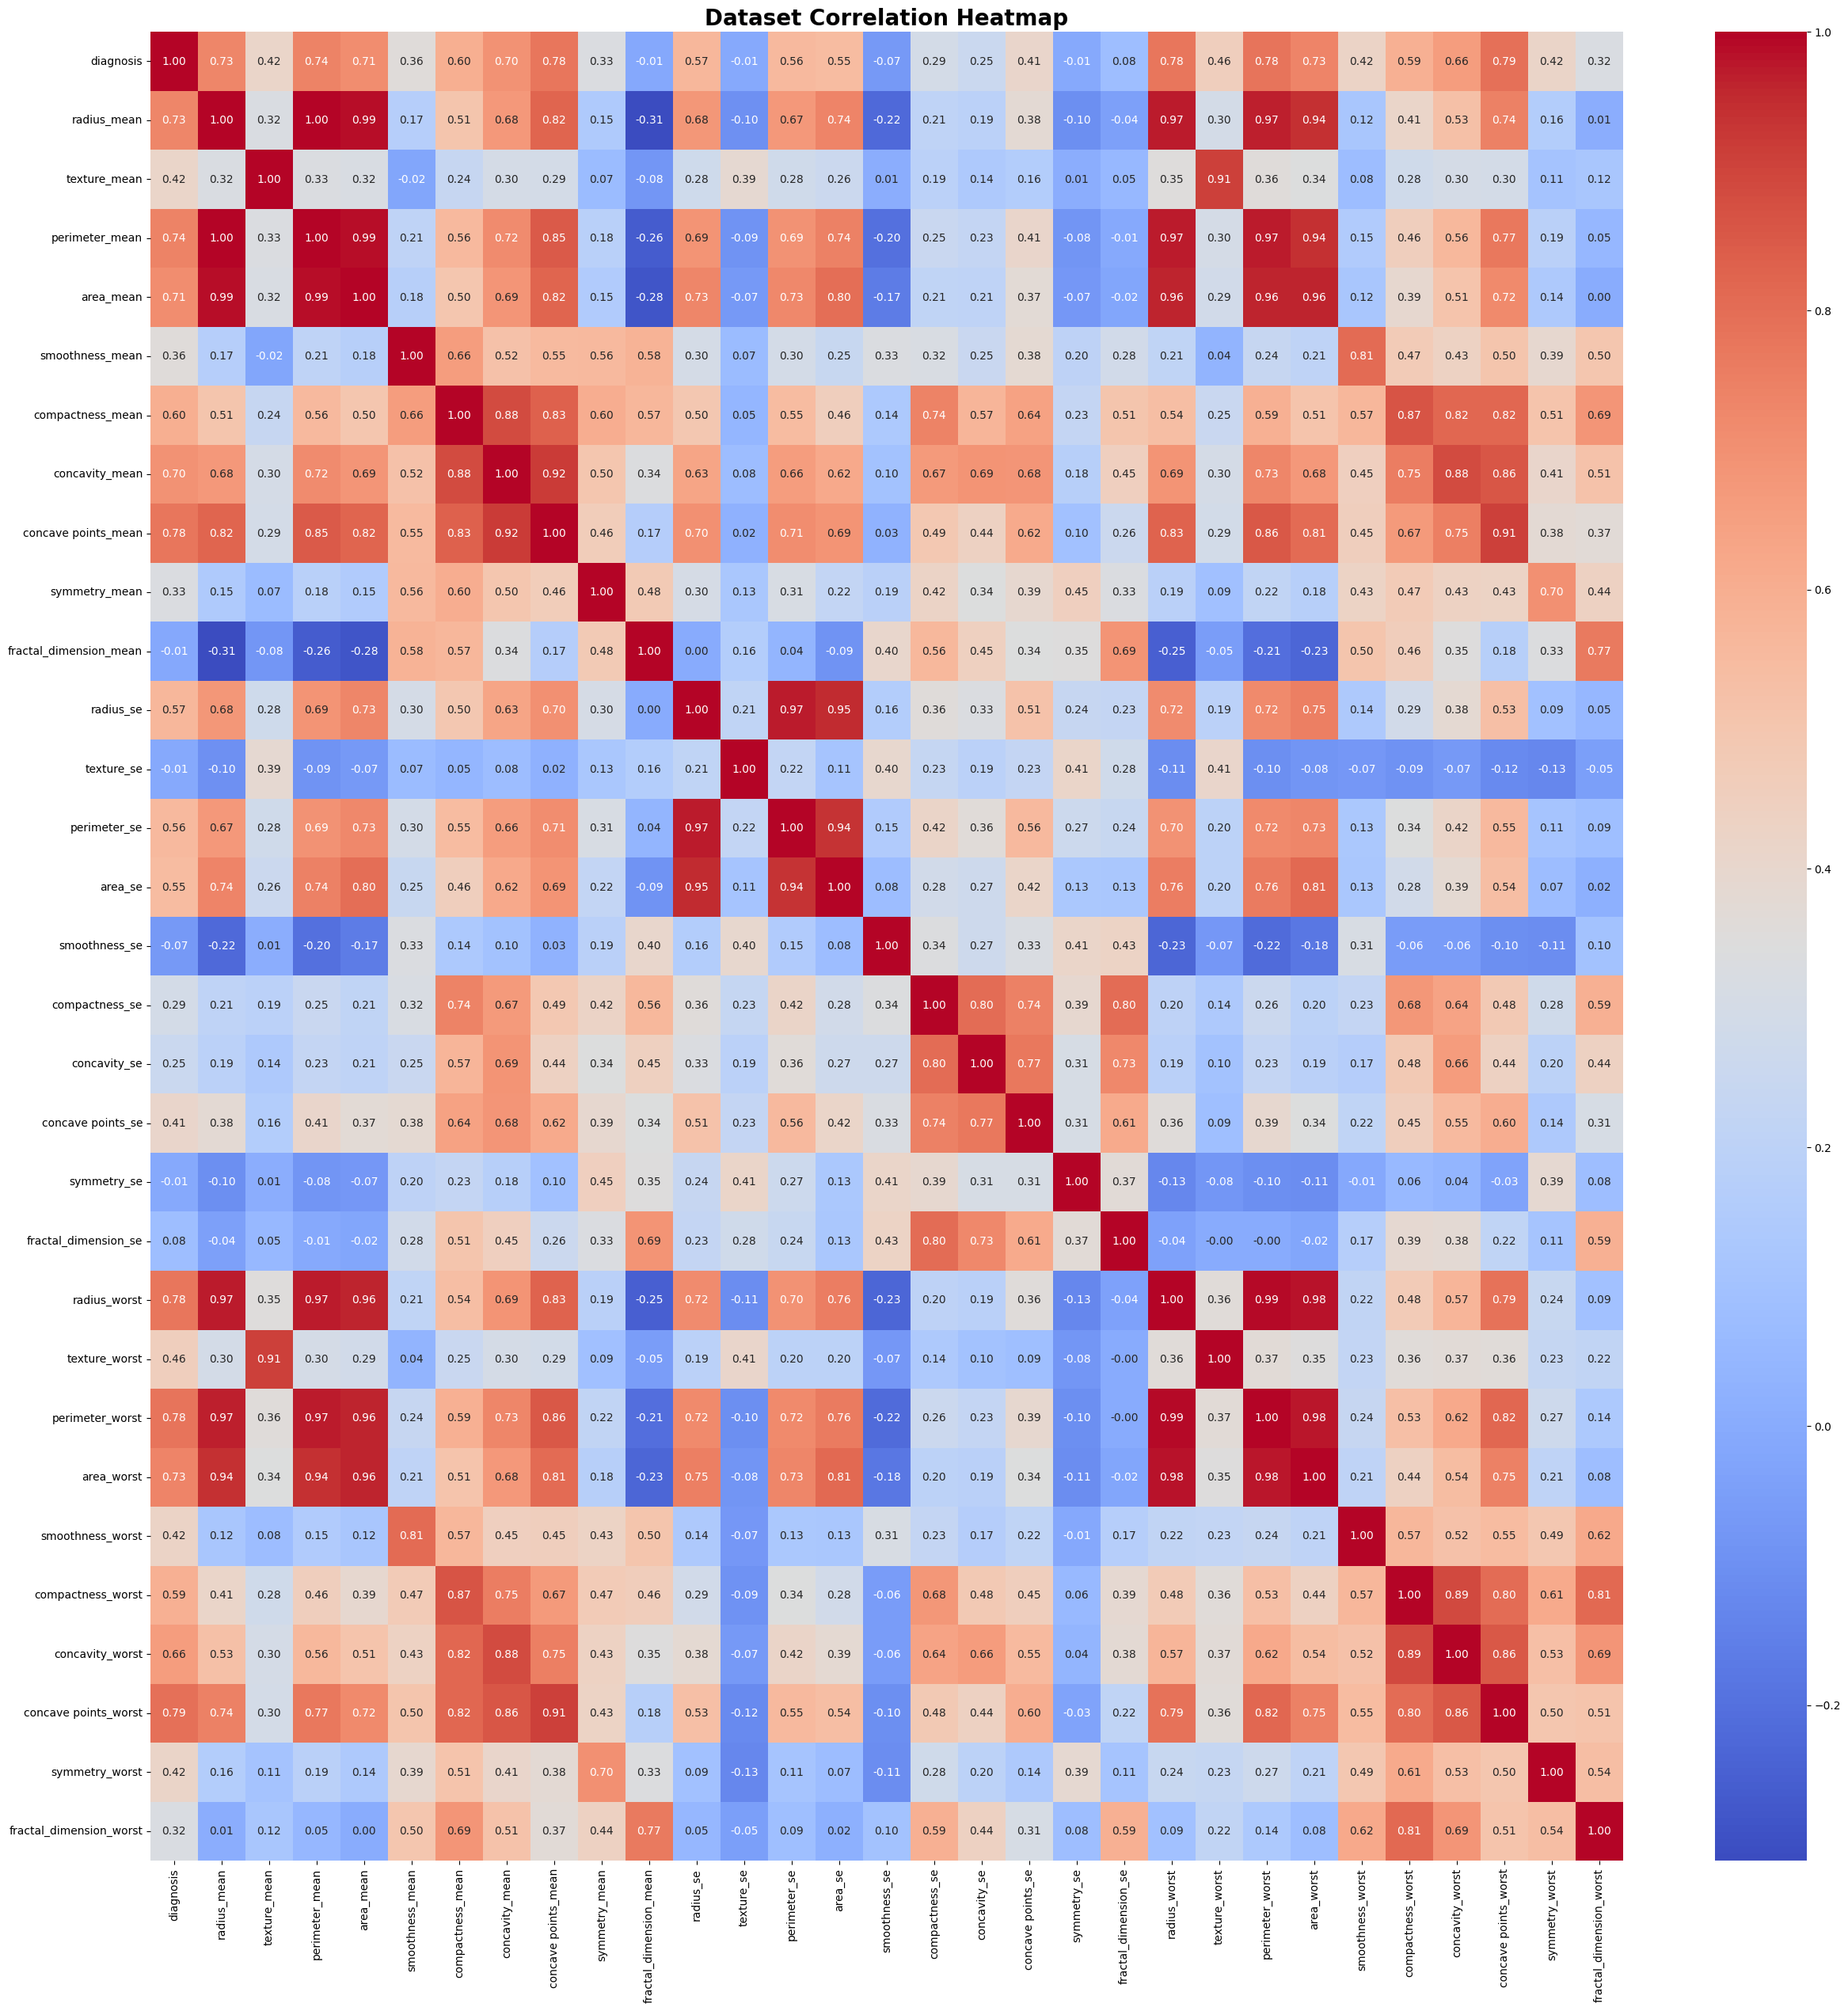

In [20]:
# Dataset Correlation Heatmap
correlation = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, annot=True, cmap='coolwarm' , fmt=".2f")
plt.title("Dataset Correlation Heatmap", fontsize=20 , fontweight='bold')
plt.show()

In [21]:
# filer columns tha has correlatoin with diagnosis column >= 50%
highCorrelatedColumnsWithTarget = correlation[correlation['diagnosis']>=0.50][['diagnosis']]

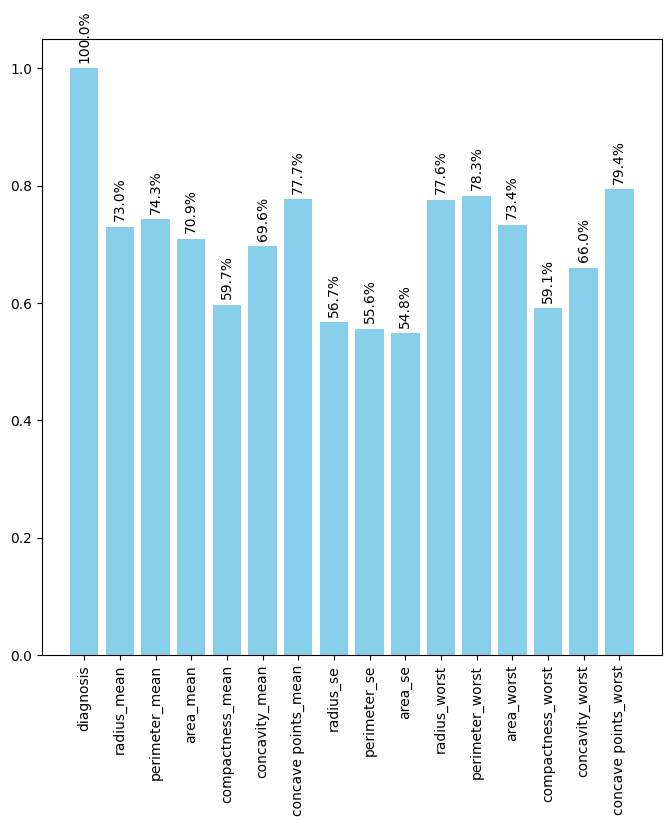

In [22]:
# Correlation Plotting for very high correlated columns with Target (diagnosis) 
plt.figure(figsize=(8, 8))
bars = plt.bar( 
    x=highCorrelatedColumnsWithTarget.index,  
    height=highCorrelatedColumnsWithTarget.diagnosis,
    color="skyblue"
)

plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval + 0.01, 
        f"{yval*100:.1f}%",
        ha='center', va='bottom', fontsize=10 , rotation = 90
    )

plt.show()


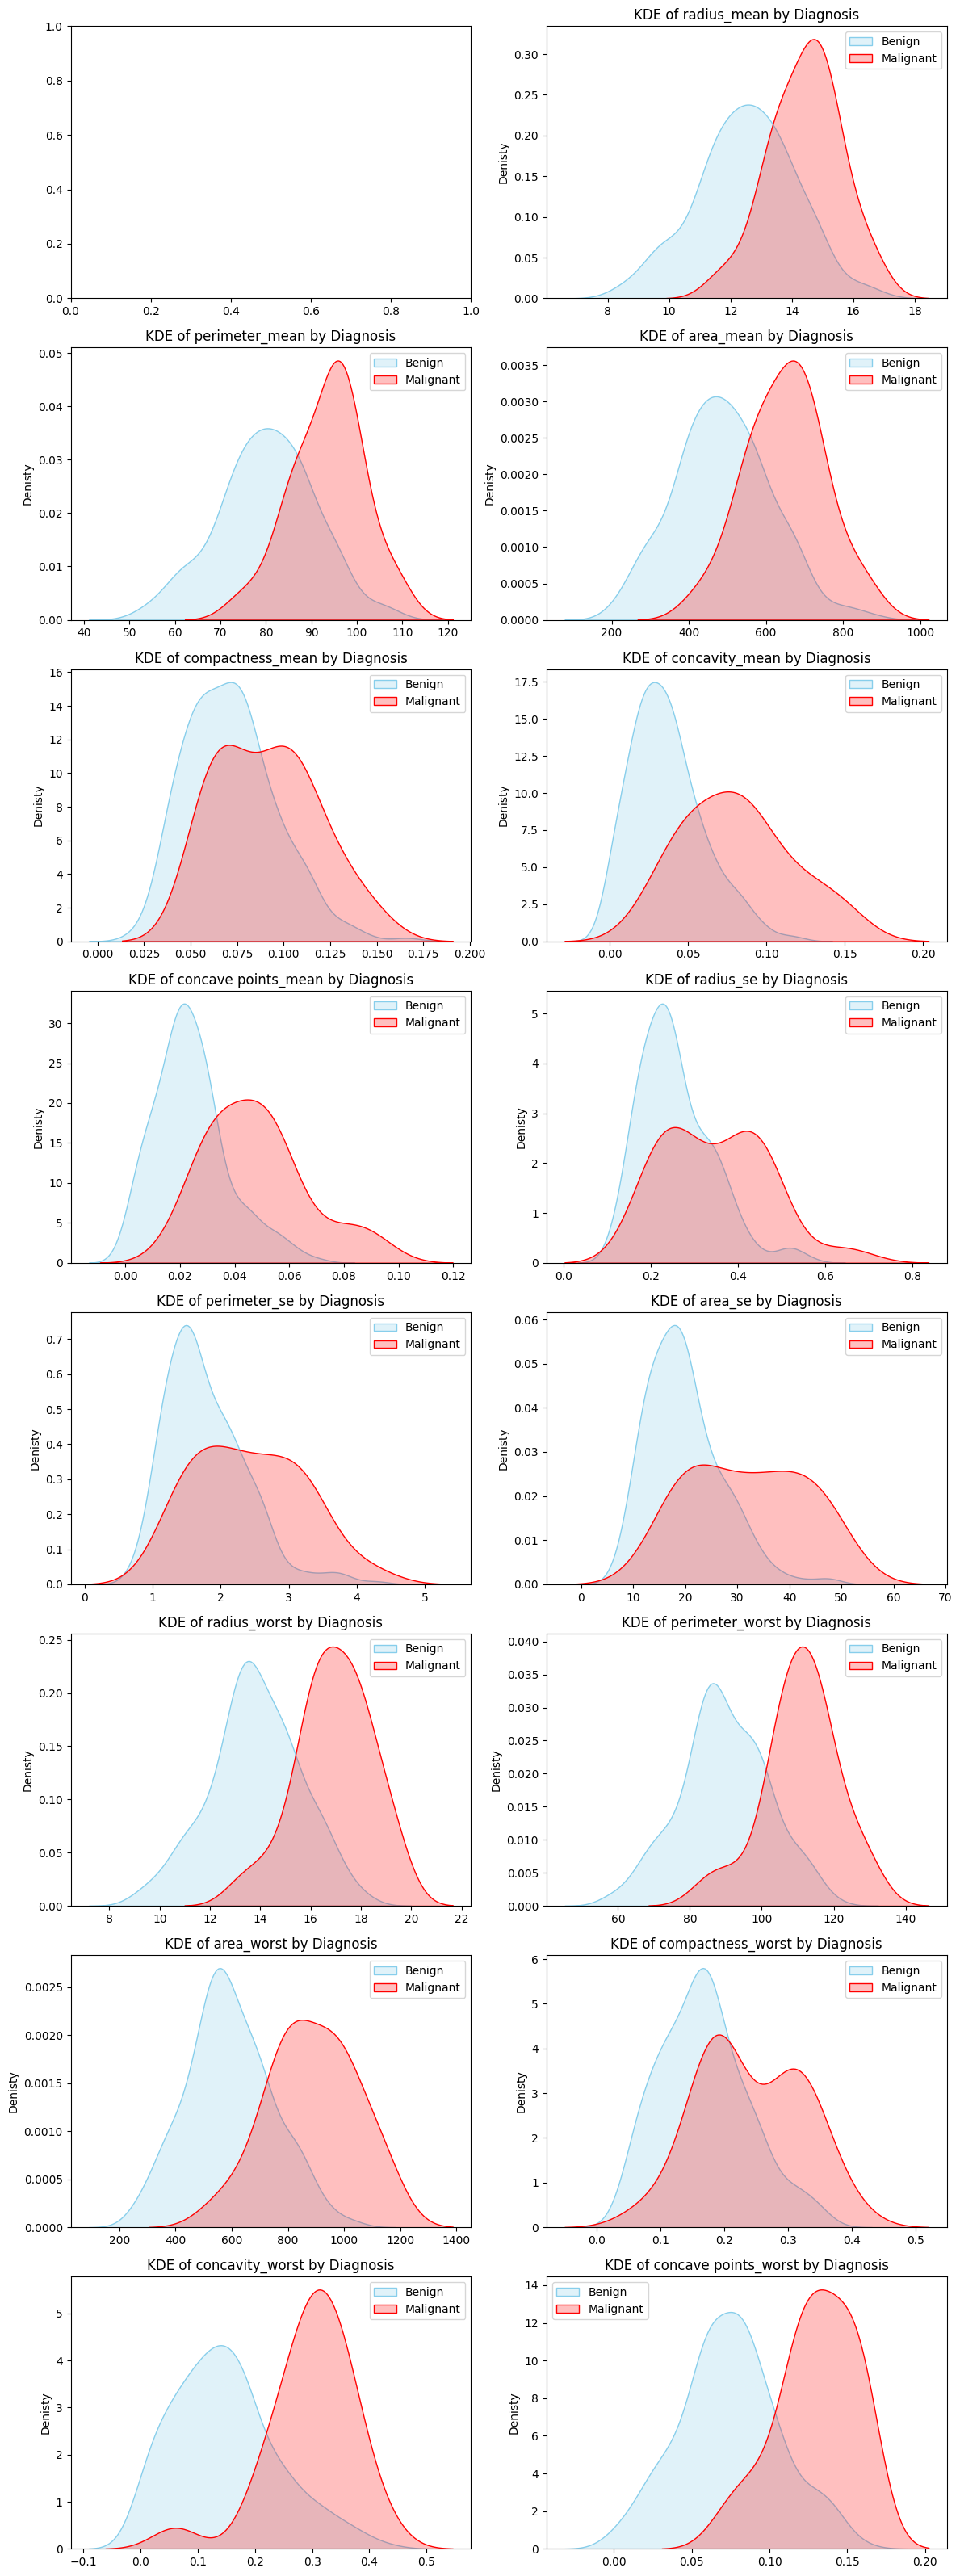

In [23]:
# KDE plotting high correlated columns by Diagnosis
num_cols = 2 
num_rows = -(-len(highCorrelatedColumnsWithTarget.index) // num_cols) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))  
axes = axes.flatten()  

for i, col in enumerate(highCorrelatedColumnsWithTarget.index):
    if col != 'diagnosis': 
        sns.kdeplot(df_cleaned[df_cleaned['diagnosis'] == 0][col], ax=axes[i], fill=True, color="skyblue", label="Benign")
        sns.kdeplot(df_cleaned[df_cleaned['diagnosis'] == 1][col], ax=axes[i], fill=True, color="red", label="Malignant")
        
        axes[i].set_title(f"KDE of {col} by Diagnosis")
        axes[i].set_xlabel("")
        axes[i].set_ylabel('Denisty')
        axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Preprocessing
* ### Separate the target column form the date 

In [24]:
x = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

In [25]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [26]:
# split the date 
xtrain , xtest , ytrain , ytest = train_test_split(X_resampled,y_resampled, random_state=42 , test_size=0.2)

### Scale the date 

In [27]:
# object from StandardScaler 
scaler = StandardScaler() 

In [28]:
# Scale the data
X_train_scaled = scaler.fit_transform(xtrain) 
X_test_scaled = scaler.transform(xtest)

In [29]:
# Transform the result to data Frame again 
X_train_scaled_as_A_Dataframe = pd.DataFrame(X_train_scaled,columns=df_cleaned.columns[1:])

## Modeling 

### Logistic Regression Model

In [30]:
# object from the algorithm 
model = LogisticRegression(max_iter=400) 

In [31]:
# train th model 
model.fit(X_train_scaled_as_A_Dataframe,ytrain)

LogisticRegression(max_iter=400)

In [32]:
# predict the result of xtest 
ypredLogisticRegression = model.predict(X_test_scaled)

In [33]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score ,accuracy_score,roc_auc_score,roc_curve
tab1=confusion_matrix(ytest,ypredLogisticRegression)
tab1

array([[47,  2],
       [ 0, 53]])

In [34]:
print(classification_report(ytest,ypredLogisticRegression))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.96      1.00      0.98        53

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102



In [35]:
# train accuracy 
print(f"{model.score(X_train_scaled,ytrain)*100:.1f}%")

98.5%


In [36]:


# test accuracy 
print(f"{model.score(X_test_scaled,ytest)*100:.1f}%")

98.0%


### SVM Model

In [37]:
# Initialize SVM model with class weighting to handle imbalance
svm_model= SVC(kernel="rbf", probability=True, random_state=42)

# Train the model
svm_model.fit(X_train_scaled, ytrain)


SVC(probability=True, random_state=42)

In [38]:
# Predict on test set
SVM_y_pred = svm_model.predict(X_test_scaled)

In [39]:
# Evaluate the model
print(classification_report(ytest, SVM_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        53

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



In [40]:
# train accuracy 
print(f"{svm_model.score(X_train_scaled,ytrain)*100:.1f}%")

99.5%


In [41]:
# test accuracy 
print(f"{svm_model.score(X_test_scaled,ytest)*100:.1f}%")

99.0%


In [42]:
import pickle
with open ('svm_model.pkl','wb') as file:
    pickle.dump(svm_model,file)

In [43]:
df.head


<bound method NDFrame.head of      diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840      

In [44]:
import pickle
with open('svm_model.pkl', 'rb') as file:
    svm_model = pickle.load(file)

In [45]:
y_pred = svm_model.predict(X_test_scaled)
print("Predictions:", y_pred)


Predictions: [1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0]


In [46]:
print(type(svm_model))

<class 'sklearn.svm._classes.SVC'>


In [48]:
# # 1. Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# import pandas as pd

# # 2. Load your dataset (example using CSV)
# Replace 'your_dataset.csv' with your file
# df = pd.read_csv('your_dataset.csv')

# # 3. Split features and target
# X = df.drop('target_column', axis=1)  # replace with your target column
# y = df['target_column']

# # 4. Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 5. Create and train the model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # 6. Make predictions
# y_pred = rf_model.predict(X_test)

# # 7. Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))